In [17]:
#Google Scrapy (Locked Out after 20-30)

from bs4 import BeautifulSoup
import urllib
import scrapy

url = 'http://www.google.com/search?q=vix&biw=1243&bih=732&source=lnt&tbs=cdr%3A1%2Ccd_min%3A2%2F7%2F2014%2Ccd_max%3A2%2F10%2F2014&tbm=nws'
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]

soup = BeautifulSoup(html, "html.parser")
print(soup.findAll("a", {"class":"l _PMs"}))

[]


In [47]:
#Google

from selenium import webdriver
from bs4 import BeautifulSoup
from datetime import timedelta, date

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2010, 1, 29)
end_date = date(2010, 2, 10)
        
path_to_chromedriver = '/Users/Qing Wang/Documents/chromedriver_win32/chromedriver.exe' # change path as needed
browser = webdriver.Chrome(executable_path = path_to_chromedriver)
browser.implicitly_wait(5)

for single_date in daterange(start_date, end_date):
    url = "http://www.google.com/search?q=vix&biw=1243&bih=732&source=lnt&tbs=cdr%3A1%2Ccd_min%3A" \
    + str(single_date.month) + "%2F" + str(single_date.day) + "%2F" + str(single_date.year) + "%2Ccd_max%3A" \
    + str(single_date.month) + "%2F" + str(single_date.day) + "%2F" + str(single_date.year) + "&tbm=nws"

    browser.get(url)
    html = browser.page_source
    soup = BeautifulSoup(html, "html.parser")
    soup = soup.findAll("a", {"class":"l _PMs"}, href=True, limit=3)
    for a in soup:
        link_text = a['href']
        print(link_text)

http://www.dekritischebelegger.nl/aandelen/opties/optiebeleggers-let-op-de-lage-vollie/
http://www.agoravox.fr/tribune-libre/article/l-atlantide-engloutie-suite-et-fin-68905
https://www.welt.de/finanzen/article6038072/Mutige-Anleger-setzen-auf-Angstbarometer-VDax.html
https://seekingalpha.com/article/185765-mondays-markets-missing-momentum
http://tradingmarkets.com/recent/moving_averages_and_the_rsi_two_exit_strategies_for_short_term_traders-742785.html
http://www.lesaffaires.com/article/byid/509562
https://www.dailyfx.com/forex/fundamental/article/special_report/2010-02-03-1100-Will_Currency_Markets__Smile__on.html
http://money.cnn.com/2010/02/04/markets/markets_newyork/index.htm
http://tradingmarkets.com/recent/calculating_covered_call_profits_-_not_as_easy_as_it_sounds-754753.html
https://www.gurufocus.com/news/83664
https://seekingalpha.com/article/187484-private-label-food-stocks-outperforming-in-a-down-market


In [54]:
#Twitter Selenium to CSV

from selenium import webdriver
from bs4 import BeautifulSoup
from datetime import timedelta, date
import csv

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2014, 7, 1)
end_date = date(2017, 11, 29)
delta=1
    
filename='twitter_stock_market.csv' 
path_to_chromedriver = '/Users/Qing Wang/Documents/chromedriver_win32/chromedriver.exe' # change path as needed
browser = webdriver.Chrome(executable_path = path_to_chromedriver)
#browser.implicitly_wait(5)

with open(filename, 'a') as csvfile:
    fieldnames = ['Date', 'Timestamp', 'Text']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames, lineterminator = '\n')
    #writer.writeheader()
    
    for single_date in daterange(start_date, end_date):
        url = "https://twitter.com/search?q=stock%20market%20since%3A" \
        + str(single_date.strftime("%Y-%m-%d")) + "%20until%3A" \
        + str((single_date+timedelta(delta)).strftime("%Y-%m-%d")) + "&src=typd"

        browser.get(url)

        html = browser.page_source
        soup = BeautifulSoup(html, "html.parser")

        tweets = soup.findAll("p", {"class":"TweetTextSize js-tweet-text tweet-text"})
        timestamps = soup.findAll("span", {"class":"_timestamp js-short-timestamp "})

        links = soup.findAll("a")
        for link in links:
            link.extract()

        results = dict(zip(tweets, timestamps))
        date = single_date.strftime("%Y-%m-%d")
        for text, time in results.items():
            try:
                writer.writerow({'Date': date, 'Timestamp': time["data-time-ms"], 'Text': text.getText()})
            except:
                print("Error:", date)

Error: 2014-08-11
Error: 2014-08-12
Error: 2014-08-13
Error: 2014-08-21
Error: 2014-08-23
Error: 2014-08-27
Error: 2014-08-29
Error: 2014-08-31
Error: 2014-09-05
Error: 2014-09-07
Error: 2014-09-13
Error: 2014-09-17
Error: 2014-10-01
Error: 2014-10-13
Error: 2014-10-15
Error: 2014-11-01
Error: 2014-11-20
Error: 2014-12-23
Error: 2015-01-10
Error: 2015-01-11
Error: 2015-01-17
Error: 2015-01-28
Error: 2015-02-13
Error: 2015-02-28
Error: 2015-03-07
Error: 2015-03-14
Error: 2015-03-27
Error: 2015-04-02
Error: 2015-04-03
Error: 2015-04-11
Error: 2015-04-12
Error: 2015-04-23
Error: 2015-05-12
Error: 2015-05-17
Error: 2015-05-29
Error: 2015-06-06
Error: 2015-06-17
Error: 2015-06-20
Error: 2015-06-23
Error: 2015-06-27
Error: 2015-06-30
Error: 2015-07-03
Error: 2015-07-05
Error: 2015-07-08
Error: 2015-07-12
Error: 2015-07-14
Error: 2015-07-25
Error: 2015-07-30
Error: 2015-08-06
Error: 2015-08-08
Error: 2015-08-09
Error: 2015-08-10
Error: 2015-08-11
Error: 2015-08-12
Error: 2015-08-13
Error: 201

Error: 2017-01-05
Error: 2017-01-05
Error: 2017-01-08
Error: 2017-01-09
Error: 2017-01-10
Error: 2017-01-11
Error: 2017-01-12
Error: 2017-01-13
Error: 2017-01-15
Error: 2017-01-16
Error: 2017-01-17
Error: 2017-01-18
Error: 2017-01-19
Error: 2017-01-22
Error: 2017-01-23
Error: 2017-01-23
Error: 2017-01-24
Error: 2017-01-25
Error: 2017-01-26
Error: 2017-01-29
Error: 2017-01-30
Error: 2017-01-31
Error: 2017-02-01
Error: 2017-02-02
Error: 2017-02-05
Error: 2017-02-06
Error: 2017-02-07
Error: 2017-02-08
Error: 2017-02-09
Error: 2017-02-12
Error: 2017-02-13
Error: 2017-02-14
Error: 2017-02-15
Error: 2017-02-16
Error: 2017-02-19
Error: 2017-02-20
Error: 2017-02-21
Error: 2017-02-22
Error: 2017-02-23
Error: 2017-02-23
Error: 2017-02-25
Error: 2017-02-26
Error: 2017-02-27
Error: 2017-02-28
Error: 2017-03-02
Error: 2017-03-03
Error: 2017-03-05
Error: 2017-03-06
Error: 2017-03-07
Error: 2017-03-08
Error: 2017-03-09
Error: 2017-03-12
Error: 2017-03-13
Error: 2017-03-14
Error: 2017-03-15
Error: 201

In [91]:
#Twitter Sentiment Analysis from CSV with vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import csv


data='twitter_stock_market_filtered.csv'
newfile='twitter_stock_market_sentiment.csv'

analyzer = SentimentIntensityAnalyzer()

with open(data, 'r') as readfile:
    reader = csv.DictReader(readfile)
    with open(newfile, 'w') as writefile:
            sentiment_fieldnames = ['date', 'timestamp', 'text', 'neg', 'neu', 'pos', 'compound']
            writer = csv.DictWriter(writefile, fieldnames=sentiment_fieldnames, lineterminator = '\n')
            writer.writeheader()
            
            for row in reader:
                scores = analyzer.polarity_scores(row['Text'])
            
                try:
                    writer.writerow({'date': row['Date'], 'timestamp': row['Timestamp'], 'text': row['Text'], 'neg': scores.get('neg'), 'neu': scores.get('neu'), 'pos': scores.get('pos'), 'compound': scores.get('compound')})
                except:
                    print("Error")

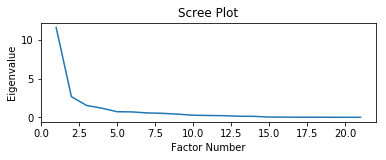

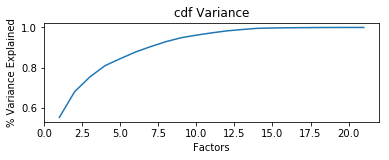

In [6]:
#PCA 

import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = pd.read_csv('VIX-Data.csv')
#y = pd.read_csv('vixdata_target.csv')

stdScaler = StandardScaler()
X = stdScaler.fit_transform(X)

ints = np.empty(21)
for k in range(1,ints.size+1):
    ints[k-1] = k;
    
pca = PCA(n_components=21)
pca.fit(X)

plt.figure(1)
plt.subplot(211)
plt.plot(ints, pca.explained_variance_)
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')

cdf = pca.explained_variance_ratio_
for k in range(1, cdf.size):
    cdf[k] += cdf[k-1]
    
plt.figure(2)
plt.subplot(212)
plt.plot(ints, cdf)
plt.xlabel('Factors')
plt.ylabel('% Variance Explained')
plt.title('cdf Variance')

plt.show()

In [4]:
#Match Up Dates for Correlation

import pandas as pd
import csv

data='vixcorreldata.csv'
newfile = 'newvixdata.csv'

X = pd.read_csv(data)
compound_dict = X.set_index('date1').to_dict()['compound']
vix_dict = X.set_index('date2').to_dict()['vix']

with open(newfile, 'w') as writefile:
        sentiment_fieldnames = ['date', 'compound', 'vix']
        writer = csv.DictWriter(writefile, fieldnames=sentiment_fieldnames, lineterminator = '\n')
        writer.writeheader()

        for val, key in vix_dict.items():
            try:
                writer.writerow({'date': val, 'compound': compound_dict[val], 'vix': key})
            except:
                break